# Twitter分析

つぶやきを集計して簡単にビジュアライズします。    
各スクリプトはMongoDBに接続可能な状態で実行してください。   

## 時系列分析
過去7日間における時間帯ごとのつぶやき数を集計し、プロットします。  
集計単位は下記のとおりです。  
- 1時間ごと
- 日ごと
- 時間帯別

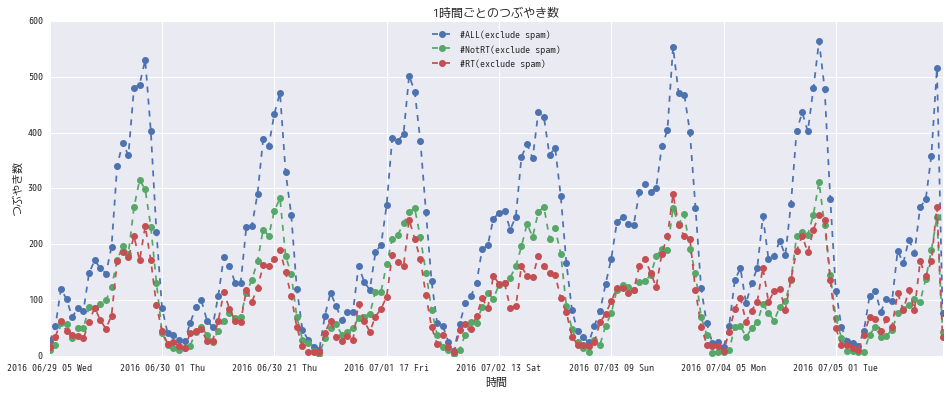

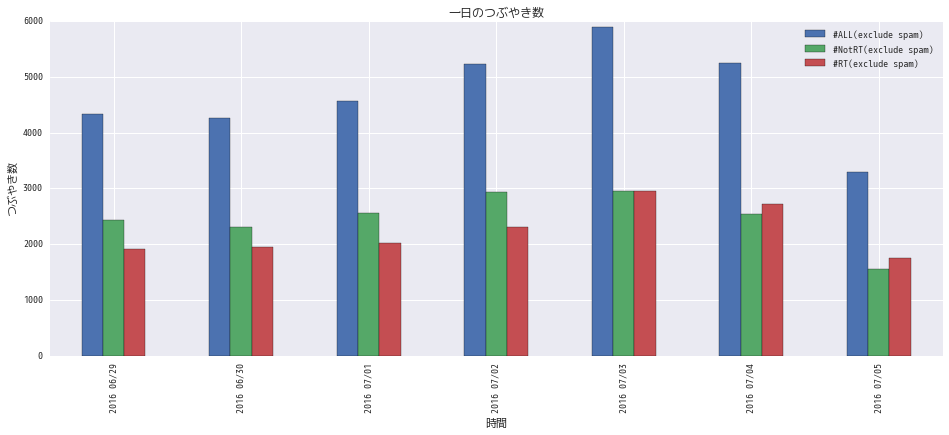

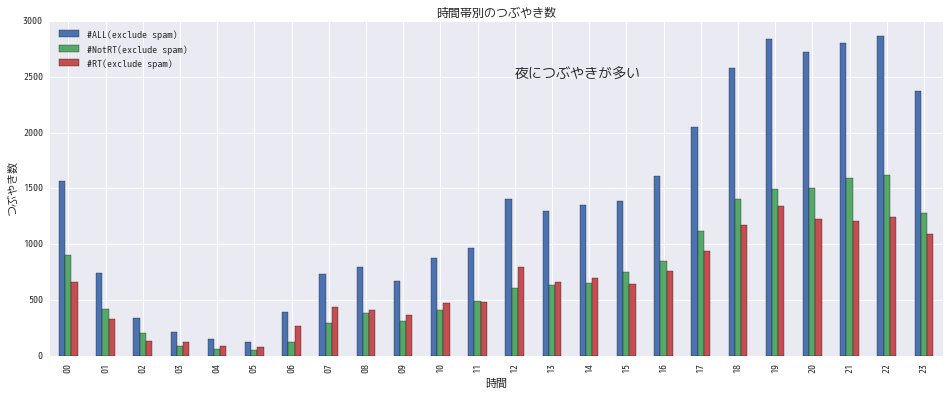

In [6]:
%matplotlib inline
from _datetime import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame

from shared.datetime_extentions import *
from shared.mongo_wrapper import *
from simple_analyzer import SimpleAnalyzer

plt.rcParams['font.family'] = 'Migu 1M'# 日本語フォントの設定

# ここの部分のコメントアウトを外して実行すると、使用可能な（インストールされている）フォントが表示されます。
# 必要に応じて、適当な日本語フォントに設定し直してださい。
"""
import matplotlib as mpl
font_paths = mpl.font_manager.findSystemFonts()
font_objects = mpl.font_manager.createFontList(font_paths)
font_names = [f.name for f in font_objects]
print(font_names)
"""

analyzer = SimpleAnalyzer()

today = datetime.today()
condition = {'created_datetime': {'$gte': today - timedelta(days=7), '$lte': today}}# 過去一週間以内の全ツィートを検索対象とする。

# 1時間ごとのつぶやき数
df = analyzer.get_time_series_data(condition, '%Y %m/%d %H %a')
df.plot(y=['#ALL(exclude spam)', '#NotRT(exclude spam)', '#RT(exclude spam)'], linestyle='dashed', marker='o', figsize=(16, 6))
plt.title('1時間ごとのつぶやき数')
plt.xlabel('時間')
plt.ylabel('つぶやき数')
plt.show()

# 日ごとのつぶやき数
df = analyzer.get_time_series_data(condition, '%Y %m/%d')
df.plot(kind='bar', y=['#ALL(exclude spam)', '#NotRT(exclude spam)', '#RT(exclude spam)'], figsize=(16, 6))
plt.title('一日のつぶやき数')
plt.xlabel('時間')
plt.ylabel('つぶやき数')
plt.show()

# 時間帯別のつぶやき数
df = analyzer.get_time_series_data(condition, '%H')
df.plot(kind='bar', y=['#ALL(exclude spam)', '#NotRT(exclude spam)', '#RT(exclude spam)'], figsize=(16, 6))
plt.text(12, 2500, '夜につぶやきが多い', fontsize=14)
plt.title('時間帯別のつぶやき数')
plt.xlabel('時間')
plt.ylabel('つぶやき数')
plt.show()

## 本日のツィート
今日のつぶやき（素データ）を最大1000件表示します。  

In [7]:
# 最大1000ツィートまで表示するように設定。
pd.options.display.max_rows = 1000 

date_format = '%Y/%m/%d %a %H:%M:%S'
today = datetime.today()
condition = {'retweeted_status': {'$eq': None},
             'created_datetime': {'$gte': today - timedelta(days=1), '$lte': today}}# 今日のツィートを検索対象とする。

results = [
    {'日付': date_to_japan_time(tweet['created_datetime']).strftime(date_format),
     'リツィート回数': tweet['retweet_count'],
     'ユーザー名': tweet['user']['screen_name'], 
     'つぶやき': tweet['text']}
    for tweet in MongoWrapper.connect_tweets().find(condition, {'created_datetime': 1, 'retweet_count': 1, 'id': 1, 'user': 1, 'text': 1})]

DataFrame(results, columns=['日付', 'リツィート回数', 'ユーザー名', 'つぶやき']).sort_values(by='日付', ascending=False).reset_index(drop=True)

,日付,リツィート回数,ユーザー名,つぶやき
0,2016/07/05 Tue 20:08:42,0,itimatukaramat3,ネットプリントのやり方知らないw
1,2016/07/05 Tue 20:08:31,0,nami20010308,あ、セブンで印刷してくるの忘れた😑
2,2016/07/05 Tue 20:08:13,0,hato_pppppp,ネットプリント行きたい〜_(X3｣ ∠) たくさん印刷したい〜バタバタバタバタ
3,2016/07/05 Tue 20:08:10,0,wasa_biin,#上半期の半年間あなたの心を支えた人\n7位：ねこね。@ネットプリントさん\n6位：ちーさん...
4,2016/07/05 Tue 20:08:06,0,_hoshi14,巷で話題のネットプリントを購入してみたら小銭を入れる手が止まらなくて
5,2016/07/05 Tue 20:07:53,0,_PUPUPUP_,@minny730 みにぴろさん、ネットプリントのご報告と嬉しいお言葉………めちゃくちゃ嬉し...
6,2016/07/05 Tue 20:07:15,0,keu_blue,フォロワさんネットプリントしてる人おらんのですか
7,2016/07/05 Tue 20:07:09,0,Hiyori0910_,陰ながらに応援してる推しレイヤーさん、二羽からすさん【@tanbakazyun 】ネットプリ...
8,2016/07/05 Tue 20:07:08,0,AiueoxoB,@nozomi__1102 わあああめちゃくちゃ嬉しいです😂✨✨\nそういえば事後報告で申し...
9,2016/07/05 Tue 20:06:54,0,owl_0777,@ichihalambo イチハラレコード店店長!!やっとプリント出来ました(＊ﾉ&gt;∇...
